In [46]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

In [47]:
# Read the data that we git from the UCI Repositary and printing a few values to see the data
df = pd.read_csv('Training_Dataset.csv')
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


Count of -1 in dataset: 4898
Count of 1 in dataset: 6157


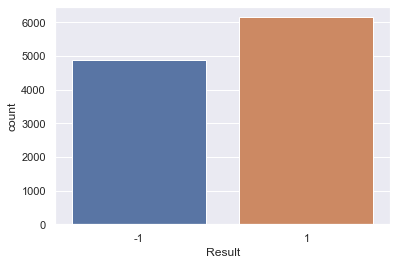

In [48]:
# Counting the discting results and their counts
neg_output=len(df[df.Result==-1])
pos_output=len(df[df.Result==1])
print("Count of -1 in dataset:", neg_output)
print("Count of 1 in dataset:", pos_output)
sns.countplot(df['Result'])

In [49]:
# to see the distribution and the stats of the variables in the dataset
df.describe()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# to check if there are any null values
df.isnull().sum()

id                             0
having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

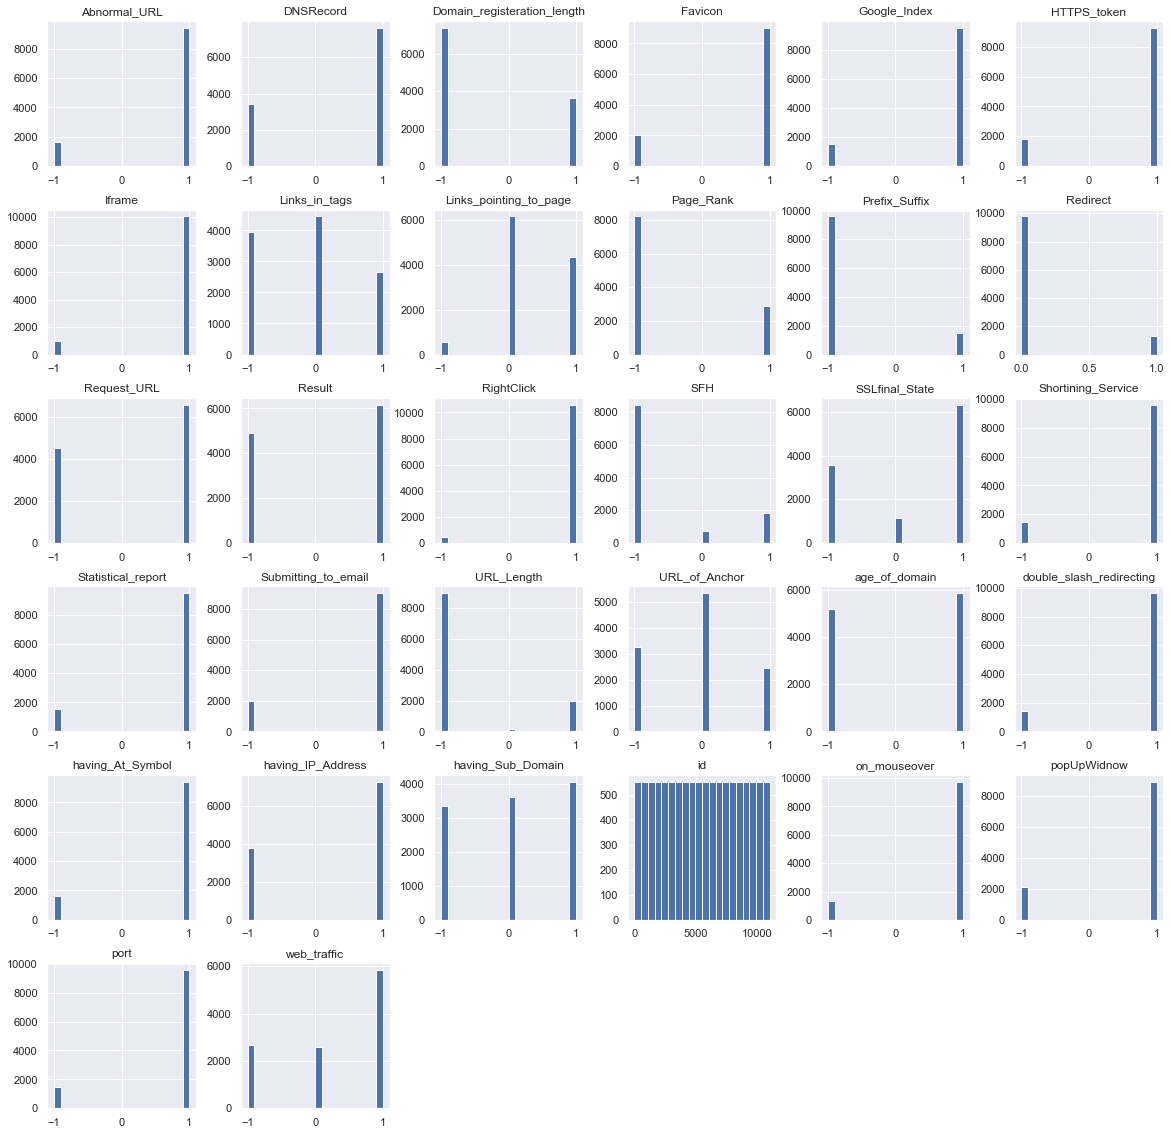

In [51]:
#to see the counts of unique values for all the variables
df.hist(bins=20,figsize=(20,20))
plt.show()

In [52]:
# corelation matrix with values
corr =df.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
id,1,-0.39,0.0061,-0.0063,-0.17,-0.0034,-0.0073,0.23,-0.0067,-0.0012,0.0073,0.0017,0.0029,-0.00086,-0.0051,-0.029,0.085,0.0058,0.0032,0.017,0.0036,-0.0053,0.0065,0.0025,0.12,0.4,-0.015,0.065,-0.013,0.0024,0.16,0.00098
having_IP_Address,-0.39,1,-0.052,0.4,0.16,0.4,-0.0053,-0.081,0.071,-0.023,0.087,0.061,0.36,0.03,0.1,0.0062,-0.011,0.078,0.34,-0.32,0.084,0.043,0.097,0.055,-0.01,-0.051,0.0029,-0.092,0.029,-0.34,-0.019,0.094
URL_Length,0.0061,-0.052,1,-0.098,-0.075,-0.081,0.055,0.004,0.049,-0.22,-0.042,0.00032,-0.089,0.25,-0.023,0.053,0.41,-0.014,-0.11,0.047,-0.045,-0.014,-0.049,-0.014,0.18,-0.041,0.009,0.18,0.0029,-0.023,-0.067,0.057
Shortining_Service,-0.0063,0.4,-0.098,1,0.1,0.84,-0.08,-0.042,-0.061,0.061,0.0061,0.0022,0.76,-0.037,0.00056,-0.13,-0.023,0.049,0.74,-0.53,0.062,0.038,0.037,0.017,-0.053,0.44,-0.047,0.015,0.16,-0.2,0.085,-0.068
having_At_Symbol,-0.17,0.16,-0.075,0.1,1,0.087,-0.012,-0.059,0.031,0.016,0.3,0.36,0.1,0.028,0.058,-0.071,-0.0087,0.37,0.2,-0.028,0.28,0.22,0.29,0.28,-0.0055,-0.048,0.033,-0.065,0.037,-0.0061,-0.08,0.053
double_slash_redirecting,-0.0034,0.4,-0.081,0.84,0.087,1,-0.086,-0.043,-0.036,0.047,0.035,0.025,0.76,-0.026,-0.005,-0.13,-0.042,0.032,0.72,-0.59,0.087,0.026,0.054,0.01,-0.05,0.43,-0.062,-0.0031,0.18,-0.19,0.07,-0.039
Prefix_Suffix,-0.0073,-0.0053,0.055,-0.08,-0.012,-0.086,1,0.088,0.26,-0.097,-0.0075,-0.023,-0.07,0.099,0.35,0.1,0.0013,-0.045,-0.078,0.016,0.013,-0.025,-0.015,-0.037,0.074,-0.017,0.11,-0.0068,0.068,0.067,-0.0028,0.35
having_Sub_Domain,0.23,-0.081,0.004,-0.042,-0.059,-0.043,0.088,1,0.27,-0.083,-0.017,0.0049,-0.037,0.1,0.23,0.094,0.096,0.0088,-0.035,0.031,-0.018,0.018,-0.025,0.011,0.12,0.13,-0.0058,0.12,0.058,-0.011,0.082,0.3
SSLfinal_State,-0.0067,0.071,0.049,-0.061,0.031,-0.036,0.26,0.27,1,-0.19,-0.015,0.027,-0.03,0.19,0.54,0.18,0.17,0.0081,-0.046,-0.021,0.024,0.016,-0.013,-0.0028,0.16,0.051,0.26,0.075,0.096,-0.012,0.063,0.71
Domain_registeration_length,-0.0012,-0.023,-0.22,0.061,0.016,0.047,-0.097,-0.083,-0.19,1,0.054,0.022,0.059,-0.61,-0.16,-0.1,-0.14,0.039,0.058,-0.016,0.024,0.024,0.051,0.0044,-0.063,-0.01,-0.13,-0.06,-0.04,0.12,-0.0022,-0.23


In [53]:
# Trying to implement logistic regression from scratch

In [54]:
#Choosing only a few variables which are more related to the Result value
x = df[['Prefix_Suffix','having_Sub_Domain','SSLfinal_State','web_traffic','Page_Rank','age_of_domain']]
y = df['Result']

In [55]:
# defining the sigmoid function whose output lies between 0 and 1 and based on which the output value is predicted
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [56]:
# to intialize the optimization function
def optimize(x, y,learning_rate,iterations,parameters): 
    size = x.shape[0]
    weight = parameters["weight"] 
    bias = parameters["bias"]
    for i in range(iterations): 
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weight -= learning_rate * dW
        bias -= learning_rate * db 
    parameters["weight"] = weight
    parameters["bias"] = bias
    return parameters

In [57]:
# Initialize the parameters
init_parameters = {} 
init_parameters["weight"] = np.zeros(x.shape[1])
init_parameters["bias"] = 0

In [58]:
# defining a training function
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [59]:
parameters_out = train(x, y, learning_rate = 0.02, iterations = 100)
parameters_out

{'weight': array([0.7559238 , 0.34468434, 0.93349031, 0.31416192, 0.37256392,
        0.14226714]), 'bias': -0.55990882387332}

In [71]:
# predicting the values and adding it to the dataset to calculate the parameters
output_values = np.dot(x,parameters_out['weight']) + parameters_out['bias']
predictions = sigmoid(output_values) >= 0.25
df['y_pred'] = predictions

In [72]:
# to convert the boolean variables to -1 and 1
df['y_pred'] = df['y_pred']*1 
df['y_pred'].replace({0: -1}, inplace=True)
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result,y_pred
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,-1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,-1,-1,0,-1,1,1,1,-1,1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,0,-1,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,-1,-1,1,-1,1,-1,1,-1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,1,-1,-1,0,-1,1,1,1,1,1


In [73]:
print("Accuracy for Logistic Regression (LREG without library): Test Data",metrics.accuracy_score(df['Result'],df['y_pred'])*100)

Accuracy for Logistic Regression (LREG without library): Test Data 88.34916327453641


In [18]:
lg_cm = confusion_matrix(df['Result'],df['y_pred'])
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm.ravel()
precision_lg = (tp_lg)/(tp_lg+fp_lg)
recall_lg = (tp_lg)/(tp_lg+fn_lg)
specificity_lg = (tn_lg)/(tn_lg+fp_lg)
f1_score_lg = (2*recall_lg*precision_lg)/(precision_lg+recall_lg)
print("Precision for test data is (LREG without library): " , precision_lg * 100)
print("Recall for test data is (LREG without library): " , recall_lg * 100)
print("Specificity for test data is (LREG without library): " , specificity_lg * 100)
print("F-Score for test data is (LREG without library): " , f1_score_lg*100)

Precision for test data is (LREG without library):  85.6267864434463
Recall for test data is (LREG without library):  87.77731268313102
Specificity for test data is (LREG without library):  88.78445117094154
F-Score for test data is (LREG without library):  86.68871434477056


In [19]:
# Using the sklearn library

In [74]:
# Read the data that we git from the UCI Repositary and printing a few values to see the data
df = pd.read_csv('Training_Dataset.csv')
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [78]:
# diving the features and target variables. Considering all the variables as features
x = df.drop(['Result', 'id'], axis = 1)
y = df['Result']

In [79]:
#Dividing the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365)
x_train.shape

(8844, 30)

In [80]:
# Logistic Regression
lg = LogisticRegression(solver = 'lbfgs',max_iter =300)
lg = lg.fit(x_train,y_train)
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)
print("Accuracy for Logistic Regression : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Logistic Regression: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Logistic Regression : Training data 92.75214834916328
Accuracy for Logistic Regression: Test Data 92.8991406603347


In [81]:
lg_cm = confusion_matrix(y_test_pred , y_test)
tp_lg ,fp_lg , fn_lg , tn_lg = lg_cm.ravel()
precision_lg = (tp_lg)/(tp_lg+fp_lg)
recall_lg = (tp_lg)/(tp_lg+fn_lg)
specificity_lg = (tn_lg)/(tn_lg+fp_lg)
f1_score_lg = (2*recall_lg*precision_lg)/(precision_lg+recall_lg)
print("Precision for test data is: " , precision_lg * 100)
print("Recall for test data is: " , recall_lg * 100)
print("Specificity for test data is: " , specificity_lg * 100)
print("F-Score for test data is: " , f1_score_lg*100)

Precision for test data is:  93.27024185068349
Recall for test data is:  90.51020408163265
Specificity for test data is:  94.80097481722177
F-Score for test data is:  91.86949766960124


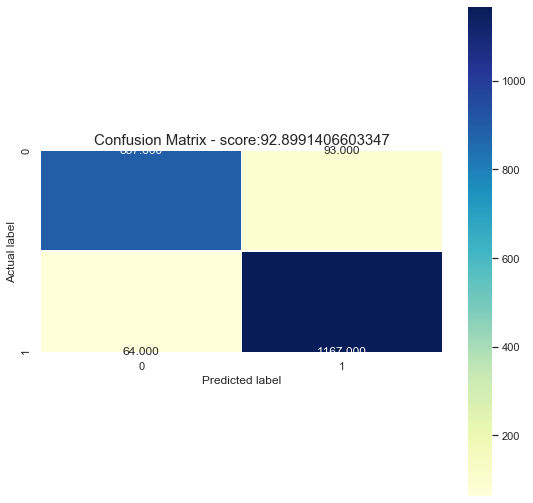

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92       980
           1       0.93      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [82]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_test_pred)*100)
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_test_pred))

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 10)
rfc=rfc.fit(x_train,y_train.ravel())
y_train_pred = rfc.predict(x_train)
y_test_pred = rfc.predict(x_test)
print("Accuracy for Random Forest : Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Random Forest: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Random Forest : Training data 98.86928991406604
Accuracy for Random Forest: Test Data 97.24106739032112


In [84]:
rfc_cm = confusion_matrix(y_test_pred , y_test)
tp_rfc ,fp_rfc , fn_rfc , tn_rfc = rfc_cm.ravel()
precision_rfc = (tp_rfc)/(tp_rfc+fp_rfc)
recall_rfc = (tp_rfc)/(tp_rfc+fn_rfc)
specificity_rfc = (tn_rfc)/(tn_rfc+fp_rfc)
f1_score_rfc = (2*recall_rfc*precision_rfc)/(precision_rfc+recall_rfc)
print("Precision for test data is: " , precision_rfc * 100)
print("Recall for test data is: " , recall_rfc * 100)
print("Specificity for test data is: " , specificity_rfc * 100)
print("F-Score for test data is: " , f1_score_rfc*100)

Precision for test data is:  97.2250770811922
Recall for test data is:  96.53061224489797
Specificity for test data is:  97.80666125101544
F-Score for test data is:  96.87660010240656


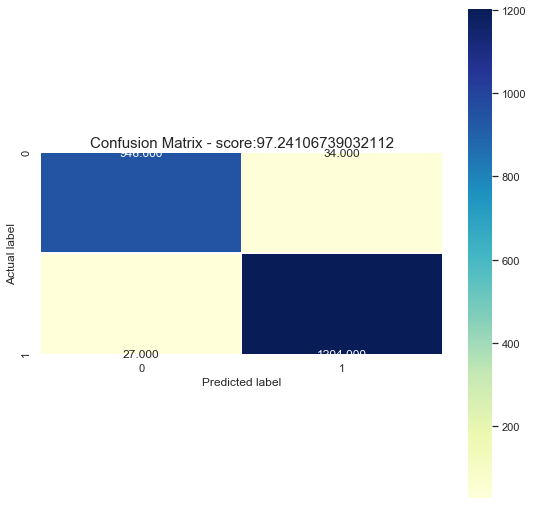

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [85]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_test_pred)*100)
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_test_pred))

In [86]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree=dtree.fit(x_train,y_train.ravel())
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)
print("Accuracy for Decision Tree Classifier: Training data",metrics.accuracy_score(y_train, y_train_pred)*100)
print("Accuracy for Decision Tree Classifier: Test Data",metrics.accuracy_score(y_test, y_test_pred)*100)

Accuracy for Decision Tree Classifier: Training data 98.98236092265942
Accuracy for Decision Tree Classifier: Test Data 96.8340117593849


In [87]:
dtree_cm = confusion_matrix(y_test_pred , y_test)
tp_d ,fp_d , fn_d , tn_d = dtree_cm.ravel()
precision_d = (tp_d)/(tp_d+fp_d)
recall_d = (tp_d)/(tp_d+fn_d)
specificity_d = (tn_d)/(tn_d+fp_d)
f1_score_d = (2*recall_d*precision_d)/(precision_d+recall_d)
print("Precision for test data is: " , precision_d * 100)
print("Recall for test data is: " , recall_d * 100)
print("Specificity for test data is: " , specificity_d * 100)
print("F-Score for test data is: " , f1_score_d*100)

Precision for test data is:  96.33401221995926
Recall for test data is:  96.53061224489797
Specificity for test data is:  97.07554833468724
F-Score for test data is:  96.43221202854231


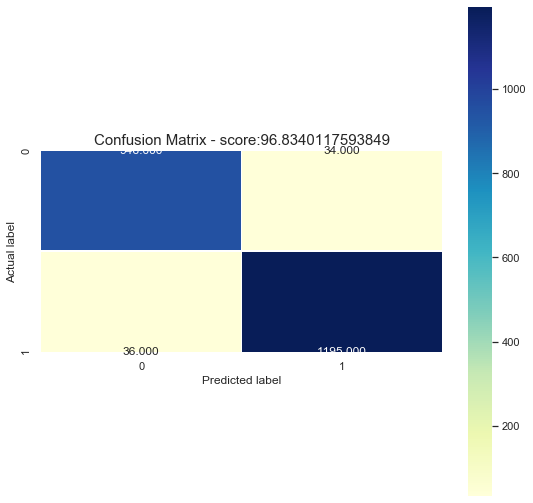

              precision    recall  f1-score   support

          -1       0.96      0.97      0.96       980
           1       0.97      0.97      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [88]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_test_pred)*100)
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_test_pred))

In [89]:
# Implement k-nearest-neighbors classifcation on dataset
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
# Accuracy scores for training and test sets
score_train = neigh.score(x_train, y_train)
score_test = neigh.score(x_test, y_test)
print("Training accuracy: ", score_train*100)
print("Testing accuracy: ", score_test*100)

Training accuracy:  96.56264133876074
Testing accuracy:  95.11533242876527


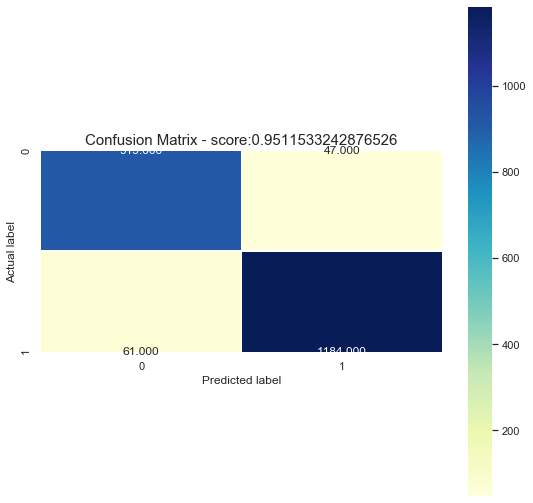

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       980
           1       0.95      0.96      0.96      1231

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



In [91]:
# Confusion matrix for test data
y_test_pred = neigh.predict(x_test)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
neigh_cm = confusion_matrix(y_test_pred, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(neigh_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_test_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_test_pred))

In [92]:
tp_neigh ,fp_neigh , fn_neigh , tn_neigh = neigh_cm.ravel()
precision_neigh = (tp_neigh)/(tp_neigh+fp_neigh)
recall_neigh = (tp_neigh)/(tp_neigh+fn_neigh)
specificity_neigh = (tn_neigh)/(tn_neigh+fp_neigh)
f1_score_neigh = (2*recall_neigh*precision_neigh)/(precision_neigh+recall_neigh)
print("Precision for test data is: " , precision_neigh * 100)
print("Recall for test data is: " , recall_neigh * 100)
print("Specificity for test data is: " , specificity_neigh * 100)
print("F-Score for test data is: " , f1_score_neigh*100)

Precision for test data is:  95.13457556935818
Recall for test data is:  93.77551020408164
Specificity for test data is:  96.18196588139723
F-Score for test data is:  94.45015416238438


In [93]:
# k-nearest-neighbors with default parameters (n=3)
neigh_def = KNeighborsClassifier(n_neighbors=3)
neigh_def.fit(x_train, y_train)

train_acc = neigh_def.score(x_train, y_train)
test_acc = neigh_def.score(x_test, y_test)
print("Training accuracy: ", train_acc*100)
print("Testing accuracy: ", test_acc*100)

Training accuracy:  97.60289461781998
Testing accuracy:  95.38670284938942


In [94]:
# k-nearest-neighbors with n=10
neigh_alt = KNeighborsClassifier(n_neighbors=10)
neigh_alt.fit(x_train, y_train)

train_acc = neigh_alt.score(x_train, y_train)
test_acc = neigh_alt.score(x_test, y_test)
print("Training accuracy: ", train_acc*100)
print("Testing accuracy: ", test_acc*100)

Training accuracy:  95.01356852103122
Testing accuracy:  94.5273631840796


In [95]:
# k-nearest-neighbors with n=1
neigh_alt = KNeighborsClassifier(n_neighbors=1)
neigh_alt.fit(x_train, y_train)

train_acc = neigh_alt.score(x_train, y_train)
test_acc = neigh_alt.score(x_test, y_test)
print("Training accuracy: ", train_acc*100)
print("Testing accuracy: ", test_acc*100)

Training accuracy:  98.79014020805066
Testing accuracy:  95.88421528720036
